# Analisis general: Esculturas publicas de Medellín
## Exploración univariable

### Importar librerias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1D1B1D', '#3B393B', '#605A39', '#7A6E45', '#9F8A6A', '#C6A078', '#B65022', '#D47138', '#F2E3C6', '#F5E1B0', '#F4F4F4', '#E0E0E0', '#2F2B2F', '#D9C6AD', '#987E5A']
sns.set_palette(sns.color_palette(colors))

import warnings
warnings.filterwarnings('ignore')

### Importar funciones especializadas

In [2]:
%run '../utils/funciones.ipynb'

### Importar datos

In [3]:
df = pd.read_csv('../data/esculturas-publicas-medellin-limpio.csv')
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983,josue giraldo,6.282358,-75.561155


### Comunas

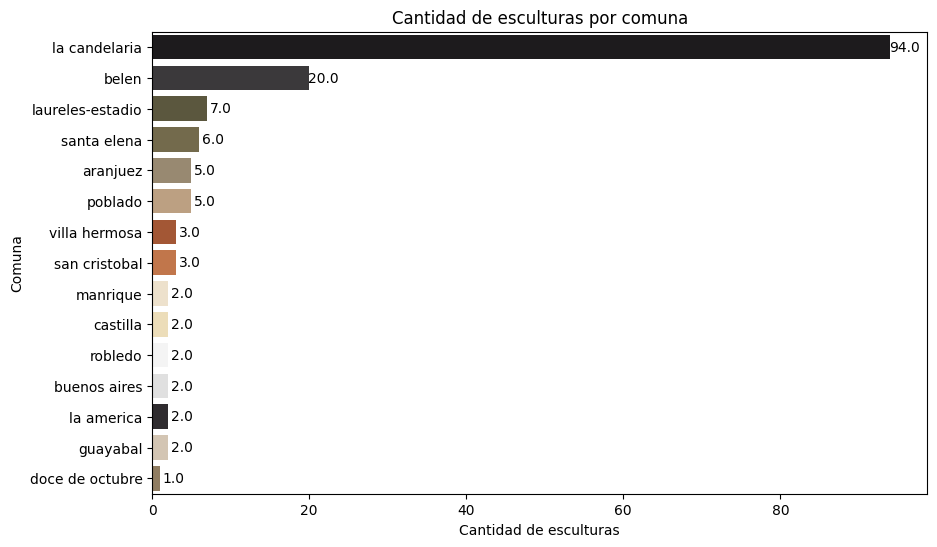

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='area', order=df['area'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas por comuna')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Comuna')
plt.show()

In [5]:
a1 = df.groupby('area').agg({'area': 'count'}).rename(columns={'area': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a1['%'] = (a1['cantidad-esculturas'] / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1['%-acum'] = (a1['cantidad-esculturas'].cumsum() / a1['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a1

,area,cantidad-esculturas,%,%-acum
0,la candelaria,94,60.3%,60.3%
1,belen,20,12.8%,73.1%
2,laureles-estadio,7,4.5%,77.6%
3,santa elena,6,3.8%,81.4%
4,aranjuez,5,3.2%,84.6%
5,poblado,5,3.2%,87.8%
6,san cristobal,3,1.9%,89.7%
7,villa hermosa,3,1.9%,91.7%
8,buenos aires,2,1.3%,92.9%
9,castilla,2,1.3%,94.2%


El pareto de las esculturas se encuentran en:
* La Candelaria
* Belen
* Laures-Estadio
* Santa Elena

### Direcciones generales

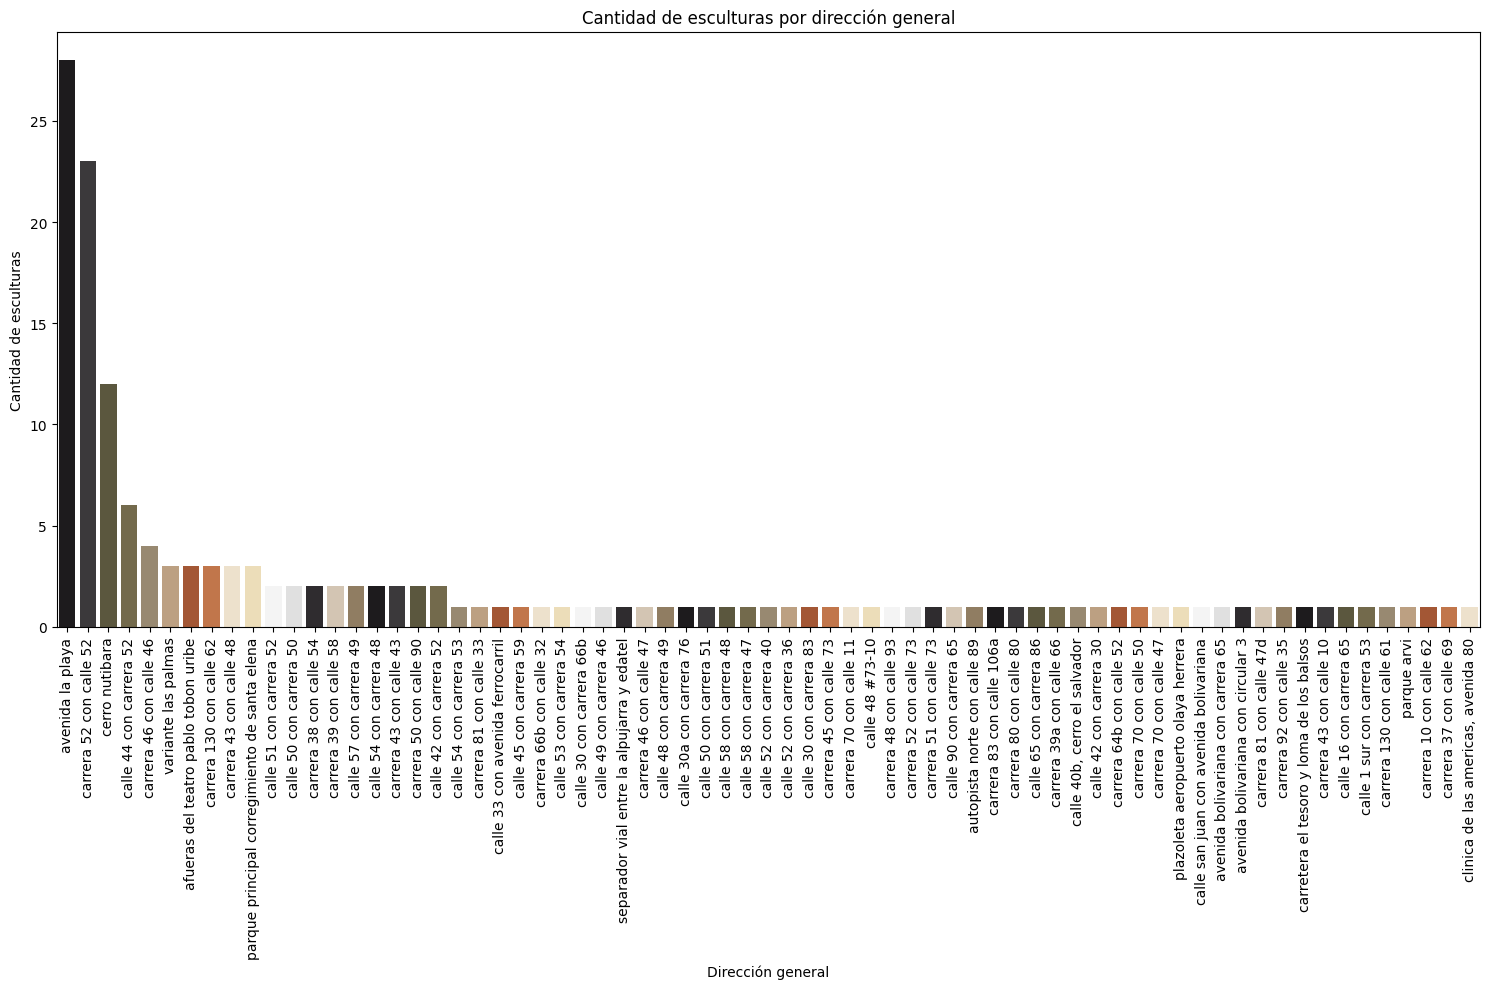

In [6]:
# Gráfico de barras para las frecuencias de categorías, ordenadas en orden descendente
plt.figure(figsize=(15, 10))
ax = sns.countplot(x='general-direction', data=df, order=df['general-direction'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por dirección general')
plt.xlabel('Dirección general')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
a2 = df.groupby('general-direction').agg({'general-direction': 'count'}).rename(columns={'general-direction': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a2['%'] = (a2['cantidad-esculturas'] / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2['%-acum'] = (a2['cantidad-esculturas'].cumsum() / a2['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a2.head()

,general-direction,cantidad-esculturas,%,%-acum
0,avenida la playa,28,17.9%,17.9%
1,carrera 52 con calle 52,23,14.7%,32.7%
2,cerro nutibara,12,7.7%,40.4%
3,calle 44 con carrera 52,6,3.8%,44.2%
4,carrera 46 con calle 46,4,2.6%,46.8%


El Top 5 de las direcciones generales son:
* Avenida La Playa
* Carrera 52 con calle 52
* Cerro Nutibara
* Calle 44 con carrera 52
* Carrera 46 con calle 46

### Tipos de esculturas

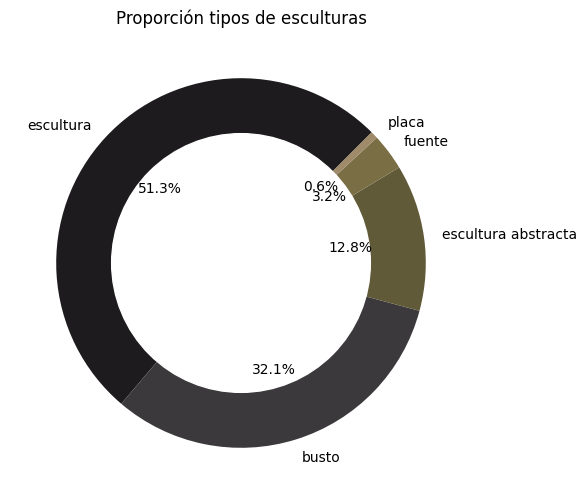

In [8]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%', startangle=45, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción tipos de esculturas')
plt.show()

In [9]:
a3 = df.groupby('type').agg({'type': 'count'}).rename(columns={'type': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a3['%'] = (a3['cantidad-esculturas'] / a3['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a3['%-acum'] = (a3['cantidad-esculturas'].cumsum() / a3['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a3

,type,cantidad-esculturas,%,%-acum
0,escultura,80,51.3%,51.3%
1,busto,50,32.1%,83.3%
2,escultura abstracta,20,12.8%,96.2%
3,fuente,5,3.2%,99.4%
4,placa,1,0.6%,100.0%


### Escultores

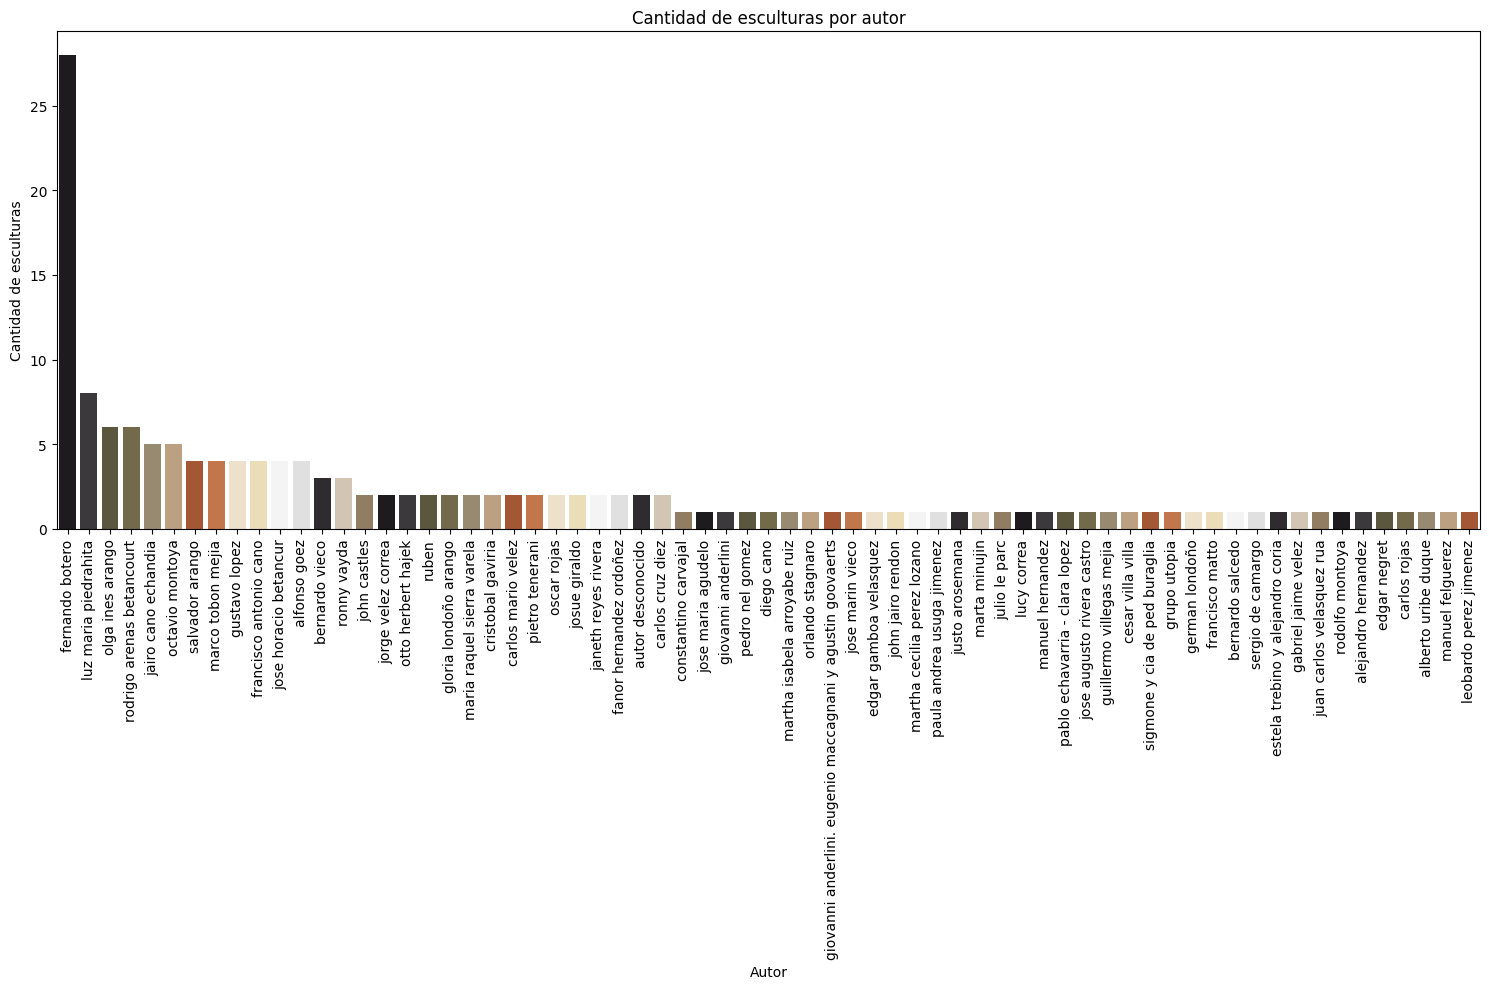

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x='author', data=df, order=df['author'].value_counts().index, palette=colors)
plt.title('Cantidad de esculturas por autor')
plt.xlabel('Autor')
plt.ylabel('Cantidad de esculturas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
a4 = df.groupby('author').agg({'author': 'count'}).rename(columns={'author': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a4['%'] = (a4['cantidad-esculturas'] / a4['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a4['%-acum'] = (a4['cantidad-esculturas'].cumsum() / a4['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a4.head(6)

,author,cantidad-esculturas,%,%-acum
0,fernando botero,28,17.9%,17.9%
1,luz maria piedrahita,8,5.1%,23.1%
2,rodrigo arenas betancourt,6,3.8%,26.9%
3,olga ines arango,6,3.8%,30.8%
4,octavio montoya,5,3.2%,34.0%
5,jairo cano echandia,5,3.2%,37.2%


### Nombres

In [12]:
a5 = df.groupby('name').agg({'name': 'count'}).rename(columns={'name': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a5['%'] = (a5['cantidad-esculturas'] / a5['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a5['%-acum'] = (a5['cantidad-esculturas'].cumsum() / a5['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a5.head(4)

,name,cantidad-esculturas,%,%-acum
0,sin titulo,3,1.9%,1.9%
1,construccion,2,1.3%,3.2%
2,andres escobar,2,1.3%,4.5%
3,atanasio girardot,2,1.3%,5.8%


#### 'Sin titulo'

In [13]:
df[df['name'] == 'sin titulo']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
52,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,carlos rojas,6.236206,-75.581944
59,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,sergio de camargo,6.236968,-75.579813
60,16,belen,sin titulo,cerro nutibara,escultura abstracta,1983,julio le parc,6.237197,-75.580086


#### 'Construccion'

In [14]:
df[df['name'] == 'construccion']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
57,16,belen,construccion,cerro nutibara,escultura abstracta,1983,manuel felguerez,6.236909,-75.580389
58,16,belen,construccion,cerro nutibara,escultura abstracta,1983,john castles,6.236852,-75.579803


#### 'Andres Escobar'

In [15]:
df[df['name'] == 'andres escobar']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
47,16,belen,andres escobar,calle 30 con carrera 66b,busto,2012,carlos mario velez,6.234617,-75.588272
48,16,belen,andres escobar,carrera 66b con calle 32,escultura,2000,alejandro hernandez,6.234572,-75.587346


#### 'Atanasio Girardot'

In [16]:
df[df['name'] == 'atanasio girardot']

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
19,11,laureles-estadio,atanasio girardot,calle 48 #73-10,busto,1954,jose horacio betancur,6.256297,-75.590996
90,10,la candelaria,atanasio girardot,calle 51 con carrera 52,busto,1910,francisco antonio cano,6.251660,-75.569785


### Año

In [17]:
a6 = df.groupby('year').agg({'year': 'count'}).rename(columns={'year': 'cantidad-esculturas'}).sort_values(by='cantidad-esculturas', ascending=False).reset_index()
a6['%'] = (a6['cantidad-esculturas'] / a6['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a6['%-acum'] = (a6['cantidad-esculturas'].cumsum() / a6['cantidad-esculturas'].sum()).map('{:.1%}'.format)
a6.head(10)

,year,cantidad-esculturas,%,%-acum
0,1997,19,12.2%,12.2%
1,2006,18,11.5%,23.7%
2,2003,11,7.1%,30.8%
3,1983,9,5.8%,36.5%
4,1994,9,5.8%,42.3%
5,1963,8,5.1%,47.4%
6,1992,4,2.6%,50.0%
7,1978,4,2.6%,52.6%
8,1962,4,2.6%,55.1%
9,1954,4,2.6%,57.7%


In [18]:
# Conteo de esculturas por año
esculturas_per_year = df['year'].value_counts().sort_index()

# Crear un rango de años desde el minumo hasta el máximo
min_year = esculturas_per_year.index.min()
max_year = esculturas_per_year.index.max()
years = pd.Series(0, index=range(min_year, max_year + 1))

# Combinar las cuentas con todos los años
esculturas_completas = years.add(esculturas_per_year, fill_value=0).astype(int).reset_index()
esculturas_completas.columns = ['year', 'cantidad-esculturas']

esculturas_completas.head()

,year,cantidad-esculturas
0,1853,1
1,1854,0
2,1855,0
3,1856,0
4,1857,0


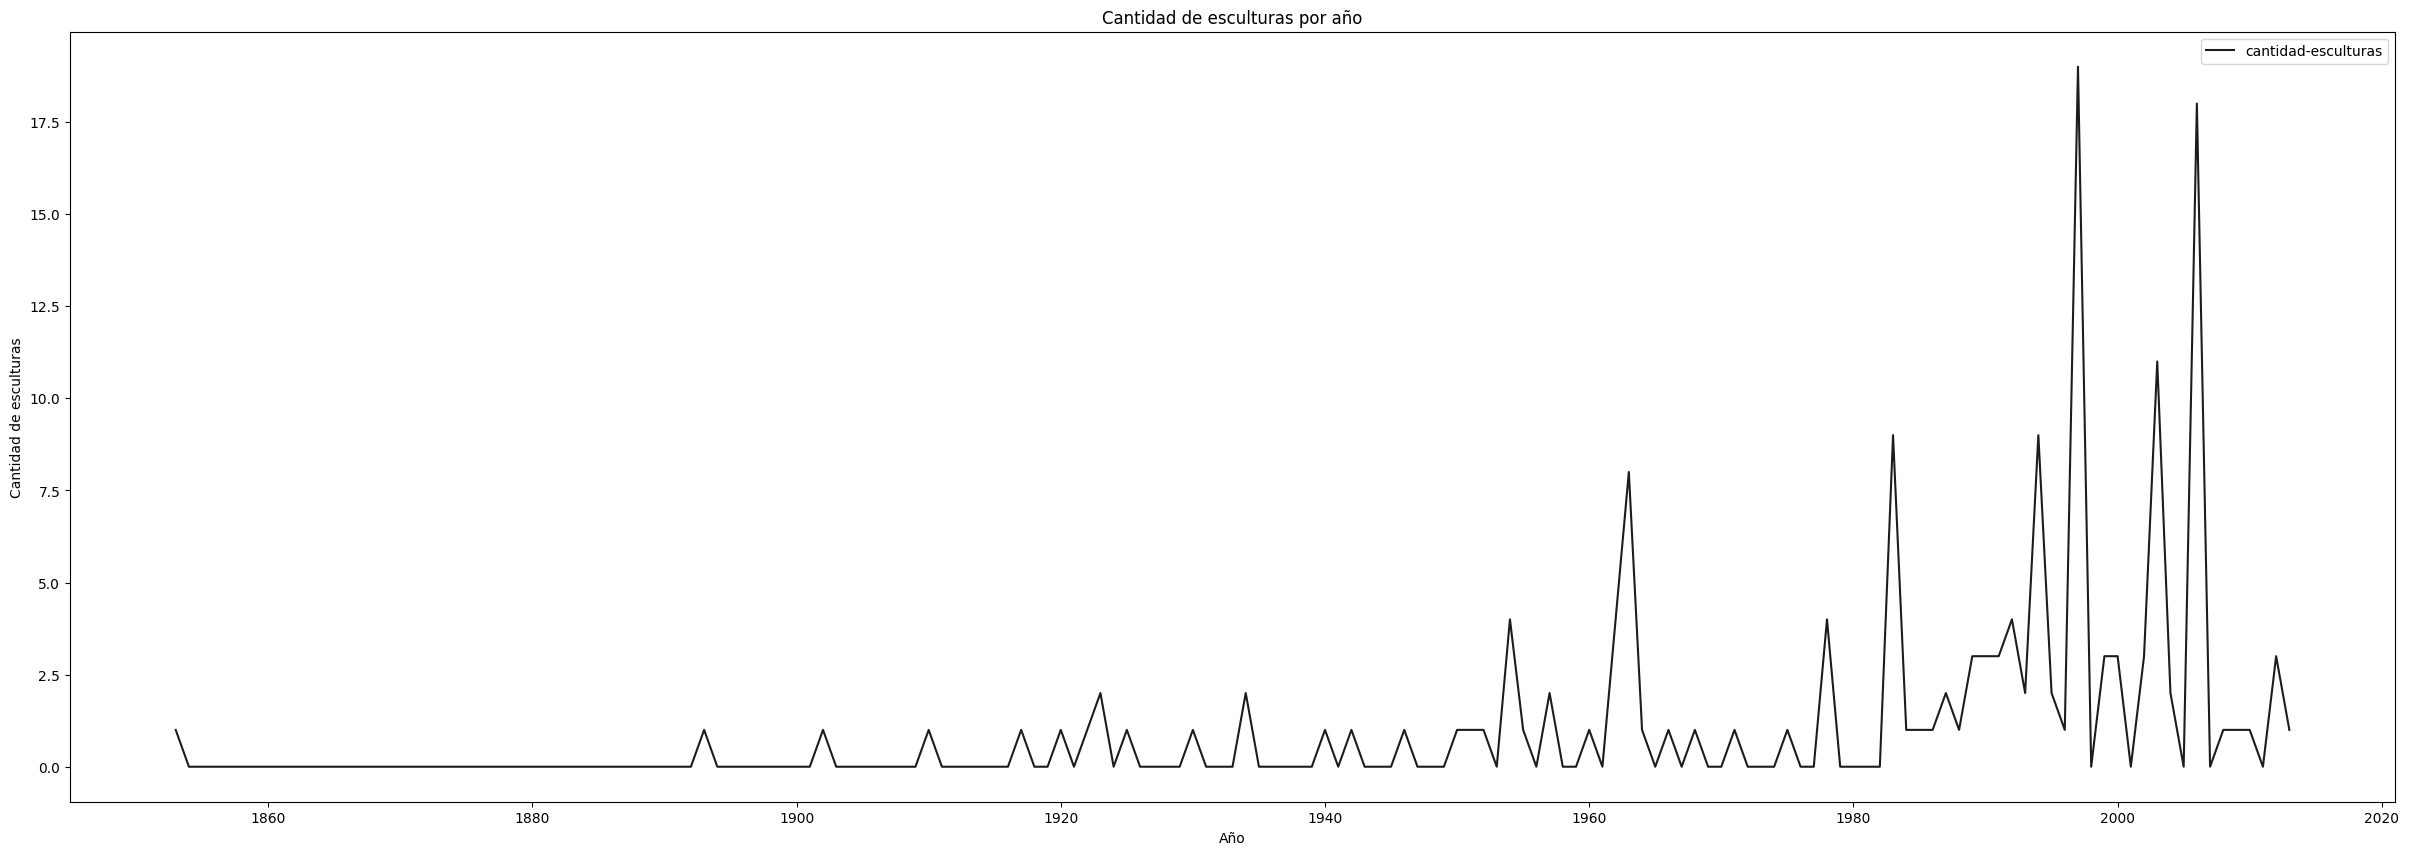

In [38]:
esculturas_completas.plot(y='cantidad-esculturas', x='year', kind='line', figsize=(30, 10), color=colors[0])
plt.title('Cantidad de esculturas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de esculturas')
plt.show()

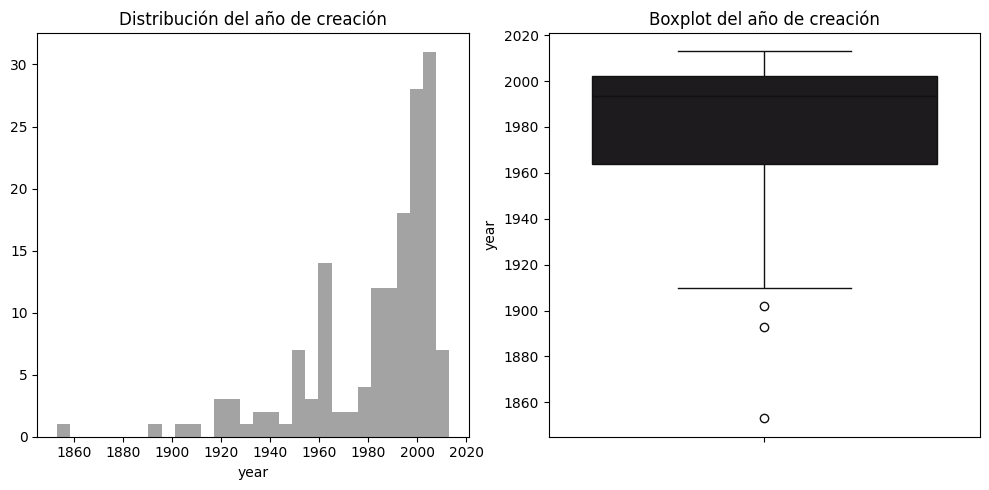

In [19]:
# Gráfico de distribución (histograma y KDE)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['year'], kde=False, bins=30, color=colors[0])
plt.title('Distribución del año de creación')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df['year'], orient='v', palette=colors)
plt.title('Boxplot del año de creación')

plt.tight_layout()
plt.show()
print()

### En resumen

Análisis univariado para la columna 'area':
----------------------------------------
Frecuencia de cada categoría:
area
la candelaria       94
belen               20
laureles-estadio     7
santa elena          6
aranjuez             5
poblado              5
villa hermosa        3
san cristobal        3
manrique             2
castilla             2
robledo              2
buenos aires         2
la america           2
guayabal             2
doce de octubre      1
Name: count, dtype: int64



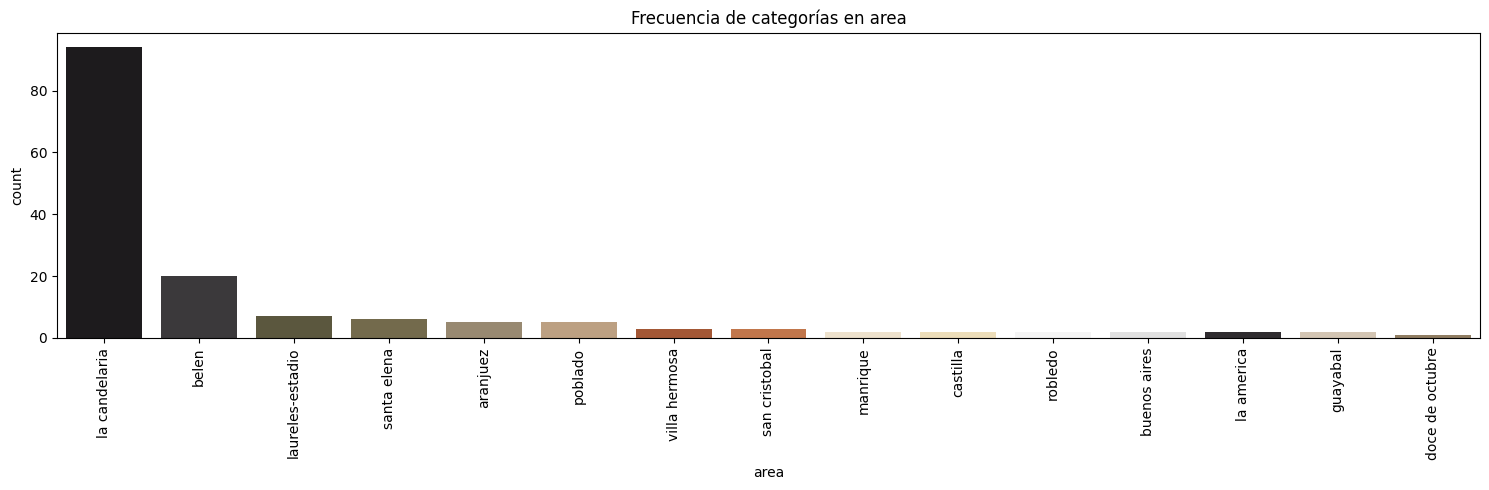


Análisis univariado para la columna 'name':
----------------------------------------
Frecuencia de cada categoría:
name
sin titulo                           3
atanasio girardot                    2
construccion                         2
andres escobar                       2
perro                                1
                                    ..
porticos                             1
guillermo zuluaga - montecristo      1
tomas carrasquilla                   1
cacique nutibara - cerro nutibara    1
carlos castro saavedra               1
Name: count, Length: 151, dtype: int64



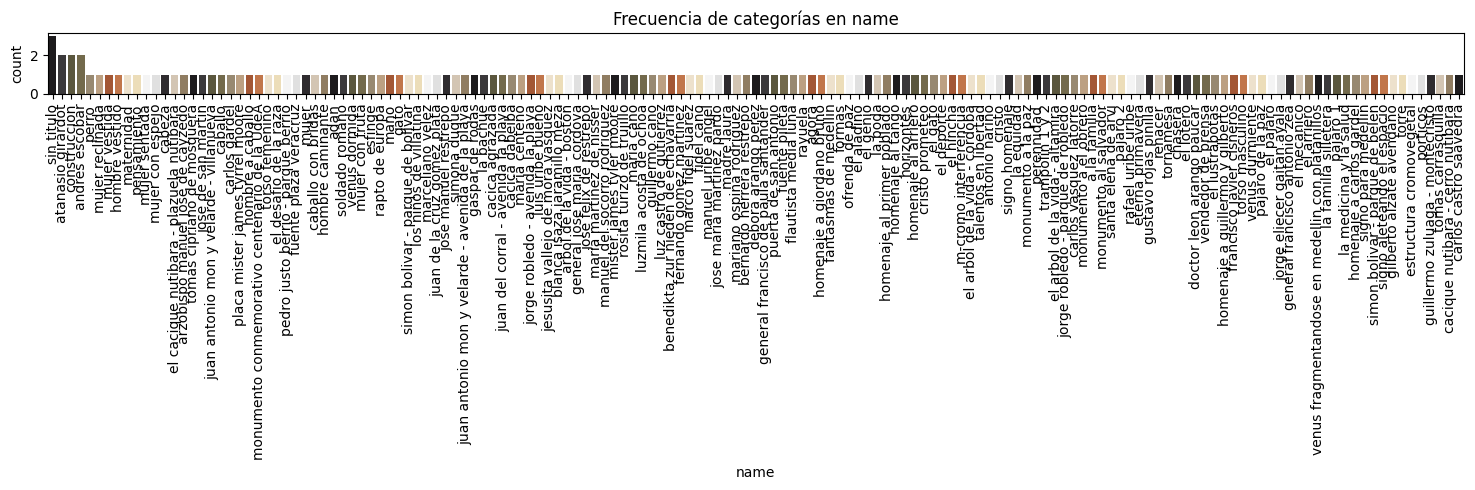


Análisis univariado para la columna 'general-direction':
----------------------------------------
Frecuencia de cada categoría:
general-direction
avenida la playa                       28
carrera 52 con calle 52                23
cerro nutibara                         12
calle 44 con carrera 52                 6
carrera 46 con calle 46                 4
                                       ..
carrera 130 con calle 61                1
parque arvi                             1
carrera 10 con calle 62                 1
carrera 37 con calle 69                 1
clinica de las americas, avenida 80     1
Name: count, Length: 69, dtype: int64



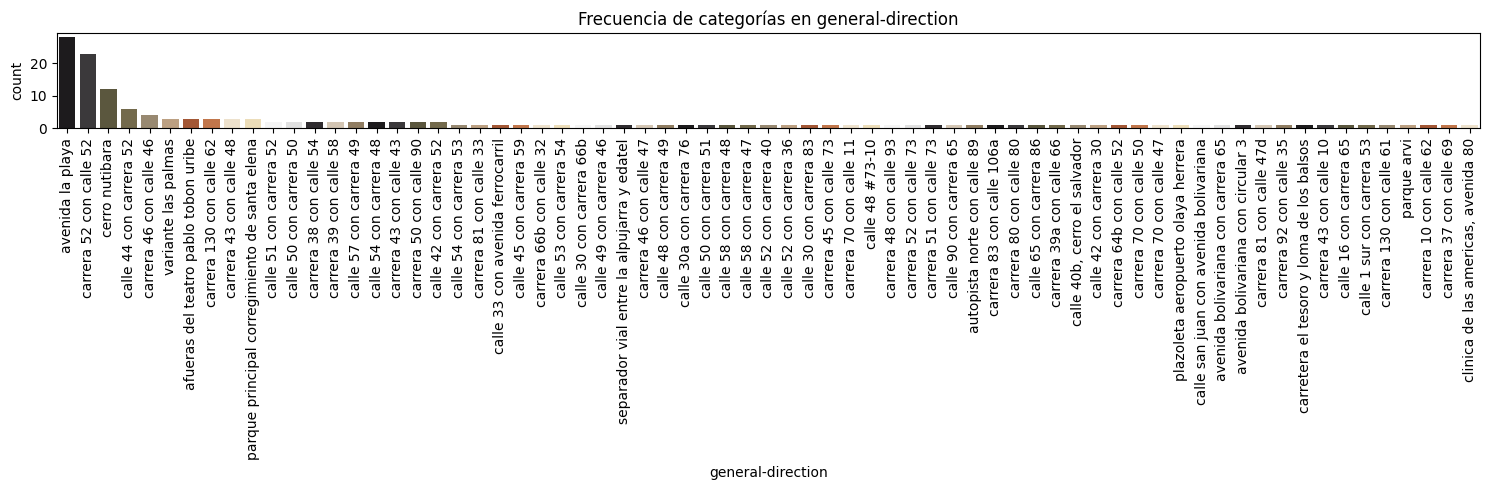


Análisis univariado para la columna 'type':
----------------------------------------
Frecuencia de cada categoría:
type
escultura              80
busto                  50
escultura abstracta    20
fuente                  5
placa                   1
Name: count, dtype: int64



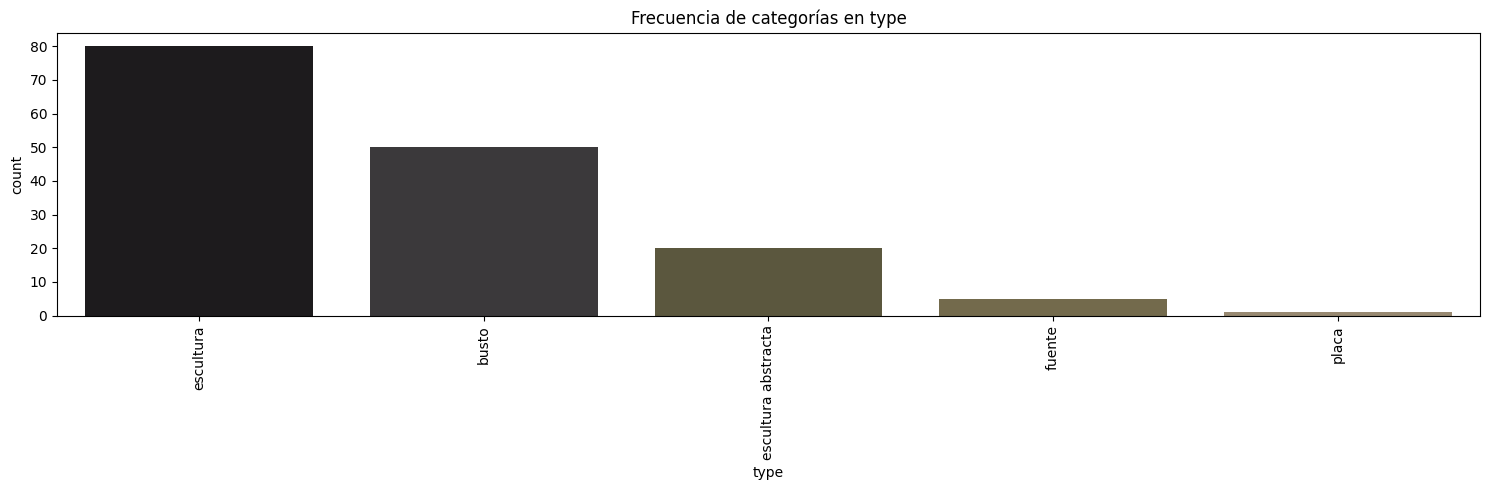


Análisis univariado para la columna 'author':
----------------------------------------
Frecuencia de cada categoría:
author
fernando botero              28
luz maria piedrahita          8
olga ines arango              6
rodrigo arenas betancourt     6
jairo cano echandia           5
                             ..
edgar negret                  1
carlos rojas                  1
alberto uribe duque           1
manuel felguerez              1
leobardo perez jimenez        1
Name: count, Length: 67, dtype: int64



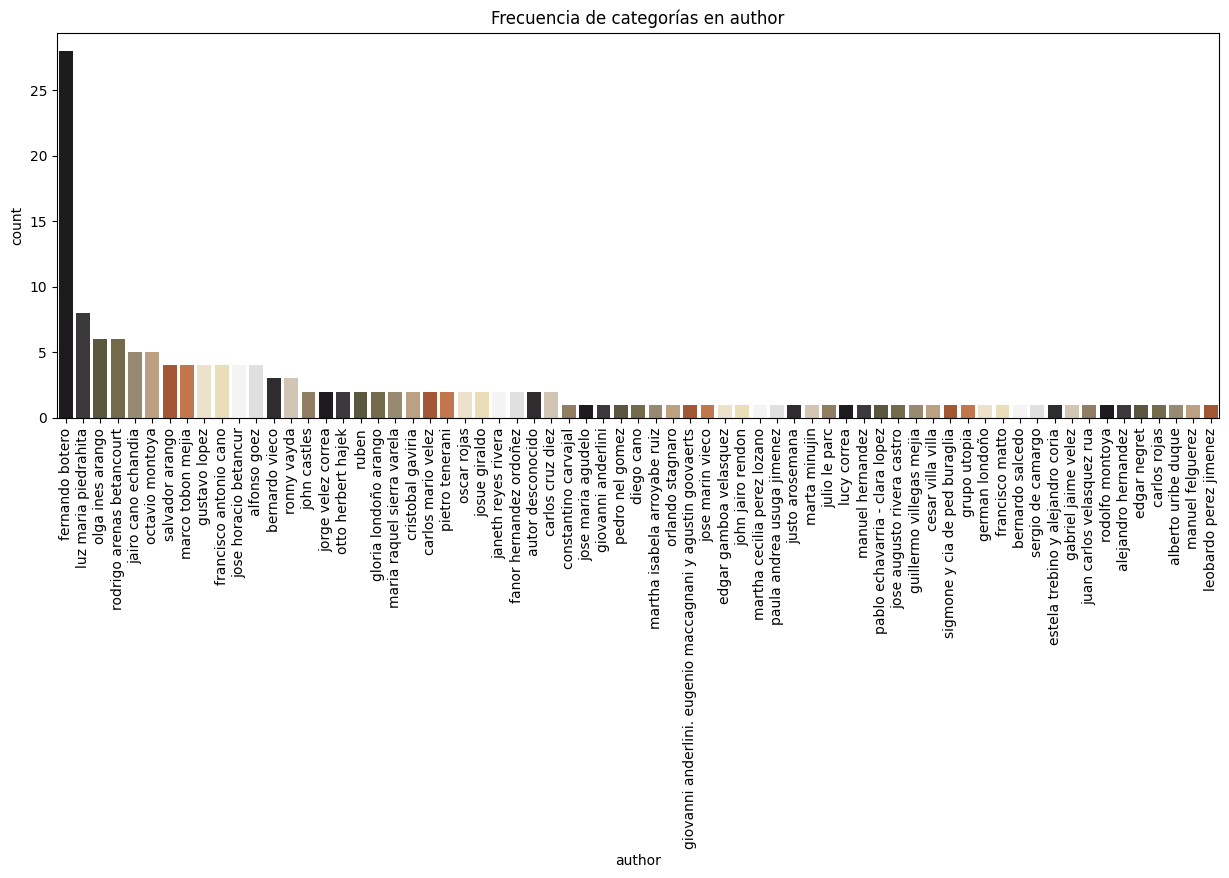

In [20]:
univariate_analysis_categorical(df)

Análisis univariado para la columna 'codigo-area':
----------------------------------------
Estadísticas descriptivas:
count    156.000000
mean      14.608974
std       16.815344
min        3.000000
25%       10.000000
50%       10.000000
75%       11.000000
max       90.000000
Name: codigo-area, dtype: float64



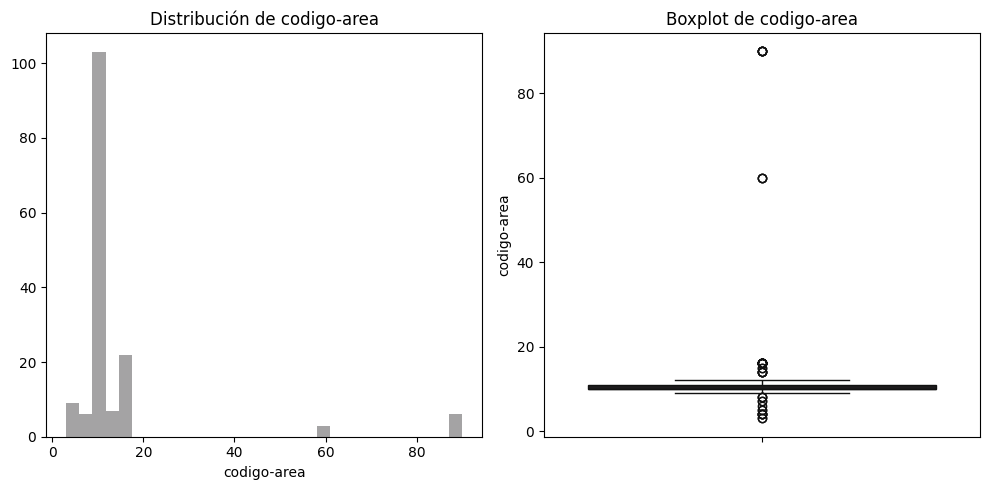


Análisis univariado para la columna 'year':
----------------------------------------
Estadísticas descriptivas:
count     156.000000
mean     1982.378205
std        27.413993
min      1853.000000
25%      1963.750000
50%      1993.500000
75%      2002.000000
max      2013.000000
Name: year, dtype: float64



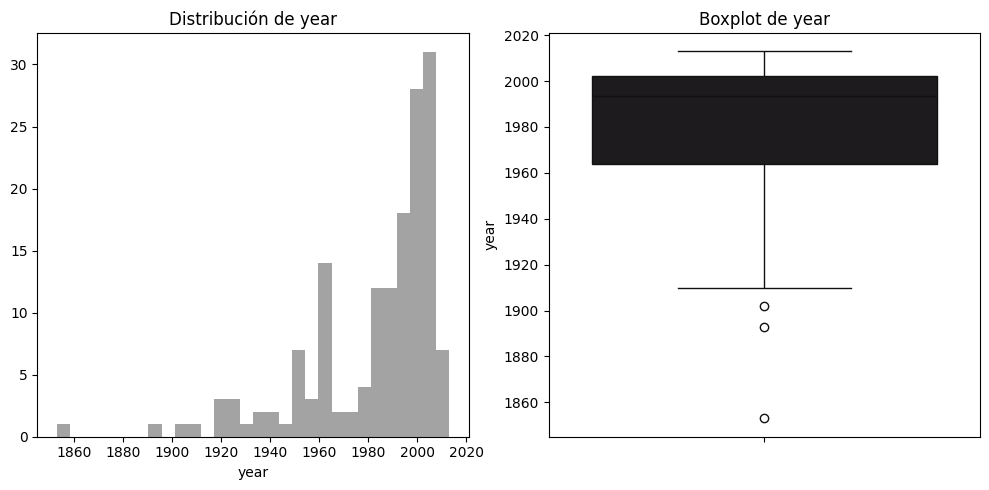


Análisis univariado para la columna 'latitude':
----------------------------------------
Estadísticas descriptivas:
count    156.000000
mean       6.246623
std        0.017568
min        6.185202
25%        6.244109
50%        6.248277
75%        6.252100
max        6.308003
Name: latitude, dtype: float64



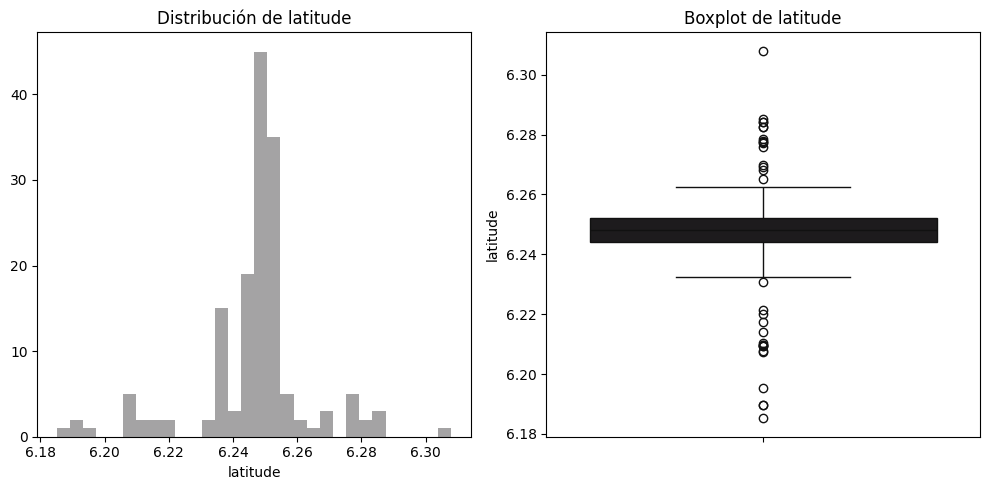


Análisis univariado para la columna 'longitude':
----------------------------------------
Estadísticas descriptivas:
count    156.000000
mean     -75.568272
std        0.020553
min      -75.636843
25%      -75.575164
50%      -75.568074
75%      -75.561375
max      -75.492149
Name: longitude, dtype: float64



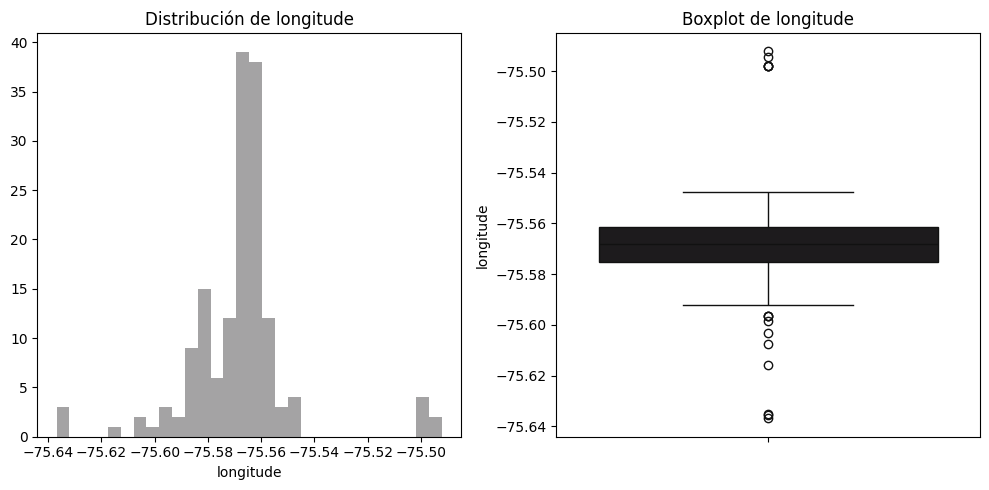

In [21]:
univariate_analysis_numeric(df)